# TEAM 5 - Software Design 1 | Model Training
This notebook is to demonstrate the models used in our software design about water quality classification.

# Data Preprocessing Pipeline

## Extract

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,r2_score, mean_absolute_error, mean_squared_error, r2_score
import warnings
import os
import datetime
import time


### Import dataset
[Dataset](https://figshare.com/articles/dataset/A_Comprehensive_Surface_Water_Quality_Monitoring_Dataset_1940-2023_2_82Million_Record_Resource_for_Empirical_and_ML-Based_Research/27800394/2?file=50757303)

In [2]:
path = 'C:/Users/Leon/Documents/Jupyter/softdes/27800394/Dataset/Combined Data/Combined_dataset.csv'
water_df = pd.read_csv(path)
water_df.tail(10) #show latest data

,Country,Area,Waterbody Type,Date,Ammonia (mg/l),Biochemical Oxygen Demand (mg/l),Dissolved Oxygen (mg/l),Orthophosphate (mg/l),pH (ph units),Temperature (cel),Nitrogen (mg/l),Nitrate (mg/l),CCME_Values,CCME_WQI
2827967,Ireland,"Cork Harbour, Moy Killala, YELLOW (KNOCK)_020",River,22-06-2021,0.042,1.0,11.684103,0.025,8.0,14.10,0.56,0.55,100.0,Excellent
2827968,Ireland,"Cork Harbour, Moy Killala, YELLOW (KNOCK)_020",River,07-10-2021,0.020,1.3,4.068000,0.019,7.6,13.50,0.51,0.51,100.0,Excellent
2827969,Ireland,"Cork Harbour, Moy Killala, YELLOW (KNOCK)_020",River,30-11-2021,0.047,1.0,4.972500,0.017,7.9,11.15,0.56,0.55,100.0,Excellent
2827970,Ireland,"Cork Harbour, Moy Killala, YELLOW (KNOCK)_020",River,08-02-2022,0.039,1.1,11.684103,0.013,7.9,8.30,0.77,0.76,100.0,Excellent
2827971,Ireland,"Cork Harbour, Moy Killala, YELLOW (KNOCK)_020",River,07-04-2022,0.030,1.0,11.684103,0.025,8.1,6.00,0.57,0.57,100.0,Excellent
2827972,Ireland,"Cork Harbour, Moy Killala, YELLOW (KNOCK)_020",River,21-06-2022,0.024,1.4,4.293000,0.025,7.9,16.20,0.37,0.37,100.0,Excellent
2827973,Ireland,"Cork Harbour, Moy Killala, YELLOW (KNOCK)_020",River,28-09-2022,0.038,1.4,4.495500,0.025,7.9,11.40,0.54,0.54,100.0,Excellent
2827974,Ireland,"Cork Harbour, Moy Killala, YELLOW (KNOCK)_020",River,29-11-2022,0.035,1.4,4.464000,0.016,7.6,6.20,0.80,0.79,100.0,Excellent
2827975,Ireland,"Cork Harbour, Moy Killala, YELLOW (KNOCK)_020",River,07-02-2023,0.046,1.4,4.176000,0.012,8.0,7.80,0.95,1.30,100.0,Excellent
2827976,Ireland,"Cork Harbour, Moy Killala, YELLOW (KNOCK)_020",River,11-04-2023,0.020,1.2,4.324500,0.025,7.9,7.90,0.49,1.30,100.0,Excellent


## Transform

#### Standardize Date

In [3]:
df = water_df.copy()
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

#separate Date into Year, Month, Day columns
# Insert after Date (at index of Date + 1, +2, +3)
date_idx = df.columns.get_loc('Date')

df.insert(date_idx + 1, 'Year', df['Date'].dt.year)
df.insert(date_idx + 2, 'Month', df['Date'].dt.month)
df.insert(date_idx + 3, 'Day', df['Date'].dt.day)

df = df.drop(columns=['Date'])

df.head()


,Country,Area,Waterbody Type,Year,Month,Day,Ammonia (mg/l),Biochemical Oxygen Demand (mg/l),Dissolved Oxygen (mg/l),Orthophosphate (mg/l),pH (ph units),Temperature (cel),Nitrogen (mg/l),Nitrate (mg/l),CCME_Values,CCME_WQI
0,Canada,SE649035-145565,River,1974,1,12,0.059248,1.30,8.1500,0.011917,8.07500,9.885,0.343917,11.73155,100.0,Excellent
1,Canada,SE649035-145565,River,1975,1,12,0.039821,1.38,7.8000,0.009417,7.73333,10.150,0.449083,11.82009,100.0,Excellent
2,Canada,SE649035-145565,River,1976,1,12,0.031341,2.23,7.8000,0.011000,7.46667,10.235,0.220750,14.87472,100.0,Excellent
3,Canada,SE649035-145565,River,1977,1,12,0.020501,1.61,8.1500,0.012333,7.78333,11.116,0.572250,15.89293,100.0,Excellent
4,Canada,SE649035-145565,River,1978,1,12,0.020023,1.64,4.3708,0.006182,7.10000,7.068,0.371091,15.22888,100.0,Excellent


### Reading Dataset Dimensions and Feature Data Types

In [4]:
print("Number of datapoints (rows):", df.shape[0])
print("Number of columns:", df.shape[1])
print("\nData types:\n", df.dtypes)

Number of datapoints (rows): 2827977
Number of columns: 16

Data types:
 Country                              object
Area                                 object
Waterbody Type                       object
Year                                  int32
Month                                 int32
Day                                   int32
Ammonia (mg/l)                      float64
Biochemical Oxygen Demand (mg/l)    float64
Dissolved Oxygen (mg/l)             float64
Orthophosphate (mg/l)               float64
pH (ph units)                       float64
Temperature (cel)                   float64
Nitrogen (mg/l)                     float64
Nitrate (mg/l)                      float64
CCME_Values                         float64
CCME_WQI                             object
dtype: object


In [5]:
df['CCME_WQI'].value_counts()

CCME_WQI
Good         1033709
Excellent    1020710
Marginal      328734
Fair          317856
Poor          126968
Name: count, dtype: int64

In [6]:
df['Waterbody Type'].value_counts()

Waterbody Type
River           1852579
Effluent         601550
Lake             153603
Estuarine         49375
Bay               45997
Sea Water         32061
Canal             28574
Sewage            23777
Marine            23162
Drainage          10205
Transitional       4275
Coastal            2819
Name: count, dtype: int64

Freshwater body types: 'River','Effluent','Sewage','Lake','Canal','Drainage' <br>
Saltwater body types: 'Bay','Sea Water','Marine','Coastal' <br>
Neither: 'Transitional','Estuarine' <br>

We'll only take the freshwater body types.

In [7]:
year_counts = df.groupby('Year').size().reset_index(name='Count')
year_counts.tail(24)

,Year,Count
60,2000,136609
61,2001,120458
62,2002,137777
63,2003,136686
64,2004,136037
65,2005,134302
66,2006,130829
67,2007,132699
68,2008,127733
69,2009,113025


We'll take the data points gathered since the start of the 2000s.

### Remove unnecessary rows

#### Filter out records of non-freshwater bodies of water

In [8]:
freshwater_types = ['River', 'Effluent', 'Sewage', 'Lake', 'Canal', 'Drainage']
df_fresh = df[df['Waterbody Type'].isin(freshwater_types)]
df_fresh['Waterbody Type'].value_counts()


Waterbody Type
River       1852579
Effluent     601550
Lake         153603
Canal         28574
Sewage        23777
Drainage      10205
Name: count, dtype: int64

In [9]:
print("Number of datapoints (rows):", df_fresh.shape[0])

Number of datapoints (rows): 2670288


#### Only get the records starting from 2000

In [10]:
df_fresh_2000 = df_fresh[df_fresh['Year'] >= 2000]
print("Number of datapoints (rows):", df_fresh_2000.shape[0])


Number of datapoints (rows): 2427809


### Check for empty or missing values


In [11]:
print("\nMissing values per column:\n", df_fresh_2000.isnull().sum())


Missing values per column:
 Country                             0
Area                                0
Waterbody Type                      0
Year                                0
Month                               0
Day                                 0
Ammonia (mg/l)                      0
Biochemical Oxygen Demand (mg/l)    0
Dissolved Oxygen (mg/l)             0
Orthophosphate (mg/l)               0
pH (ph units)                       0
Temperature (cel)                   0
Nitrogen (mg/l)                     0
Nitrate (mg/l)                      0
CCME_Values                         0
CCME_WQI                            0
dtype: int64


In [12]:
df_fresh_2000.describe().applymap(lambda x: f"{x:.2f}")

C:\Users\Leon\AppData\Local\Temp\ipykernel_23848\2153952414.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_fresh_2000.describe().applymap(lambda x: f"{x:.2f}")


,Year,Month,Day,Ammonia (mg/l),Biochemical Oxygen Demand (mg/l),Dissolved Oxygen (mg/l),Orthophosphate (mg/l),pH (ph units),Temperature (cel),Nitrogen (mg/l),Nitrate (mg/l),CCME_Values
count,2427809.00,2427809.00,2427809.00,2427809.00,2427809.00,2427809.00,2427809.00,2427809.00,2427809.00,2427809.00,2427809.00,2427809.00
mean,2010.04,6.43,14.85,1.33,5.33,10.05,0.80,7.72,11.47,5.85,4.98,83.39
std,6.56,3.41,8.49,6.02,17.44,1.85,2.19,0.49,4.02,6.38,5.36,18.11
min,2000.00,1.00,1.00,-0.01,-2.00,0.00,-0.00,0.00,-5.26,0.00,0.00,31.30
25%,2004.00,3.00,8.00,0.03,1.60,9.87,0.04,7.50,8.81,1.42,1.30,74.34
50%,2009.00,6.00,14.00,0.07,2.70,10.20,0.14,7.78,11.46,5.00,4.50,89.63
75%,2015.00,9.00,22.00,0.50,3.00,11.00,0.30,7.96,13.91,7.10,5.42,100.00
max,2023.00,12.00,31.00,200.00,255.00,20.00,100.00,30.00,98.00,46.00,155.00,100.00


### Managing Outliers

In [13]:
#make a copy of the dataframe earlier
df_filtered = df_fresh_2000.copy()

Q1 = df_filtered['Ammonia (mg/l)'].quantile(0.25)
Q3 = df_filtered['Ammonia (mg/l)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1 * IQR
upper_bound = Q3 + 1 * IQR   
df_filtered = df_filtered[(df_filtered['Ammonia (mg/l)'] >= lower_bound) & (df_filtered['Ammonia (mg/l)'] <= upper_bound)]
df_filtered.count()

Country                             2074849
Area                                2074849
Waterbody Type                      2074849
Year                                2074849
Month                               2074849
Day                                 2074849
Ammonia (mg/l)                      2074849
Biochemical Oxygen Demand (mg/l)    2074849
Dissolved Oxygen (mg/l)             2074849
Orthophosphate (mg/l)               2074849
pH (ph units)                       2074849
Temperature (cel)                   2074849
Nitrogen (mg/l)                     2074849
Nitrate (mg/l)                      2074849
CCME_Values                         2074849
CCME_WQI                            2074849
dtype: int64

In [14]:
Q1 = df_filtered['pH (ph units)'].quantile(0.25)
Q3 = df_filtered['pH (ph units)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1 * IQR
upper_bound = Q3 + 1 * IQR   
df_filtered = df_filtered[(df_filtered['pH (ph units)'] >= lower_bound) & (df_filtered['pH (ph units)'] <= upper_bound)]
df_filtered.count()

Country                             1842695
Area                                1842695
Waterbody Type                      1842695
Year                                1842695
Month                               1842695
Day                                 1842695
Ammonia (mg/l)                      1842695
Biochemical Oxygen Demand (mg/l)    1842695
Dissolved Oxygen (mg/l)             1842695
Orthophosphate (mg/l)               1842695
pH (ph units)                       1842695
Temperature (cel)                   1842695
Nitrogen (mg/l)                     1842695
Nitrate (mg/l)                      1842695
CCME_Values                         1842695
CCME_WQI                            1842695
dtype: int64

In [15]:
Q1 = df_filtered['Nitrate (mg/l)'].quantile(0.25)
Q3 = df_filtered['Nitrate (mg/l)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1 * IQR
upper_bound = Q3 + 1 * IQR   
df_filtered = df_filtered[(df_filtered['Nitrate (mg/l)'] >= lower_bound) & (df_filtered['Nitrate (mg/l)'] <= upper_bound)]
df_filtered.count()

Country                             1674462
Area                                1674462
Waterbody Type                      1674462
Year                                1674462
Month                               1674462
Day                                 1674462
Ammonia (mg/l)                      1674462
Biochemical Oxygen Demand (mg/l)    1674462
Dissolved Oxygen (mg/l)             1674462
Orthophosphate (mg/l)               1674462
pH (ph units)                       1674462
Temperature (cel)                   1674462
Nitrogen (mg/l)                     1674462
Nitrate (mg/l)                      1674462
CCME_Values                         1674462
CCME_WQI                            1674462
dtype: int64

In [16]:
df_filtered['CCME_WQI'].value_counts()

CCME_WQI
Good         738540
Excellent    641960
Fair         162524
Marginal     114578
Poor          16860
Name: count, dtype: int64

### Label Encoding of Classifications

In [17]:
df_mapped = df_filtered.copy()

mapping = {
    "Excellent": 5,
    "Good": 4,
    "Fair": 3,
    "Marginal": 2,
    "Poor": 1
}

df_mapped["CCME_WQI"] = df_mapped["CCME_WQI"].map(mapping)
df_mapped.groupby("CCME_WQI").head(1)

,Country,Area,Waterbody Type,Year,Month,Day,Ammonia (mg/l),Biochemical Oxygen Demand (mg/l),Dissolved Oxygen (mg/l),Orthophosphate (mg/l),pH (ph units),Temperature (cel),Nitrogen (mg/l),Nitrate (mg/l),CCME_Values,CCME_WQI
26,Canada,LI110048,River,2000,1,12,0.051520,3.90760,11.684103,0.01000,8.37000,10.0000,0.241667,9.739400,100.000000,5
38,Canada,RO24100,River,2010,6,8,0.014039,2.31000,11.684103,0.06100,8.32727,12.5000,0.400000,5.836820,93.116725,4
78,Canada,IT09S1304,River,2005,1,12,0.012880,0.17000,9.658000,7.74127,8.08500,10.4929,0.034000,0.349733,46.010915,2
311,Canada,ESCHC2129,River,2012,6,10,0.200000,1.08300,9.557000,0.40000,7.69300,15.1670,0.400000,6.000000,77.666786,3
2577,Canada,ES100ESPF090002000,River,2012,9,11,0.200000,2.13333,9.824000,20.00000,7.79000,12.0000,0.400000,5.350000,43.537526,1


### Removal of unnecessary features/columns

In [18]:
print(list(df_mapped.columns))

['Country', 'Area', 'Waterbody Type', 'Year', 'Month', 'Day', 'Ammonia (mg/l)', 'Biochemical Oxygen Demand (mg/l)', 'Dissolved Oxygen (mg/l)', 'Orthophosphate (mg/l)', 'pH (ph units)', 'Temperature (cel)', 'Nitrogen (mg/l)', 'Nitrate (mg/l)', 'CCME_Values', 'CCME_WQI']


*The only columns needed are data pertaining to pH level, Nitrate concentration, and Ammonia concentration, as these are the components used in DENR water quality guidelines and standards that can also be tested by the client in remote areas through reagents for the aforementioned components.*

*So, that leaves us with 4 columns (the 3 columns for the components and the water classification)*

In [19]:
feature_names = [ 'Ammonia (mg/l)',
                  'pH (ph units)',
                  'Nitrate (mg/l)',
                ]
df_cluster = df_cluster = df_mapped[feature_names].copy()
df_cluster.head()

,Ammonia (mg/l),pH (ph units),Nitrate (mg/l)
26,0.05152,8.3700,9.73940
28,0.07728,8.0167,8.72119
29,0.09016,7.7900,9.51805
30,0.10304,8.1583,8.63265
31,0.10304,7.7900,8.76546


### Reclassification

The classification that will be used is based on the [DENR Guidelines for Water Quality Management in the Philippines (DAO 2016-08)](https://emb.gov.ph/wp-content/uploads/2019/04/DAO-2016-08_WATER-QUALITY-GUIDELINES-AND-GENERAL-EFFLUENT-STANDARDS.pdf). 
For freshwater analysis, we'll be using Classes A, B, C, and D. Clustering was used to help determine if 4 classes is enough to group the data points together.

#### Clustering via K-means

In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_cluster)

# statistics of scaled data
pd.DataFrame(data_scaled).describe().map(lambda x: f"{x:.2f}")

,0,1,2
count,1674462.00,1674462.00,1674462.00
mean,0.00,-0.00,0.00
std,1.00,1.00,1.00
min,-0.73,-2.39,-1.50
25%,-0.57,-0.56,-0.96
50%,-0.49,-0.02,0.28
75%,0.00,0.70,0.36
max,4.44,2.26,2.63


Text(0, 0.5, 'Inertia')

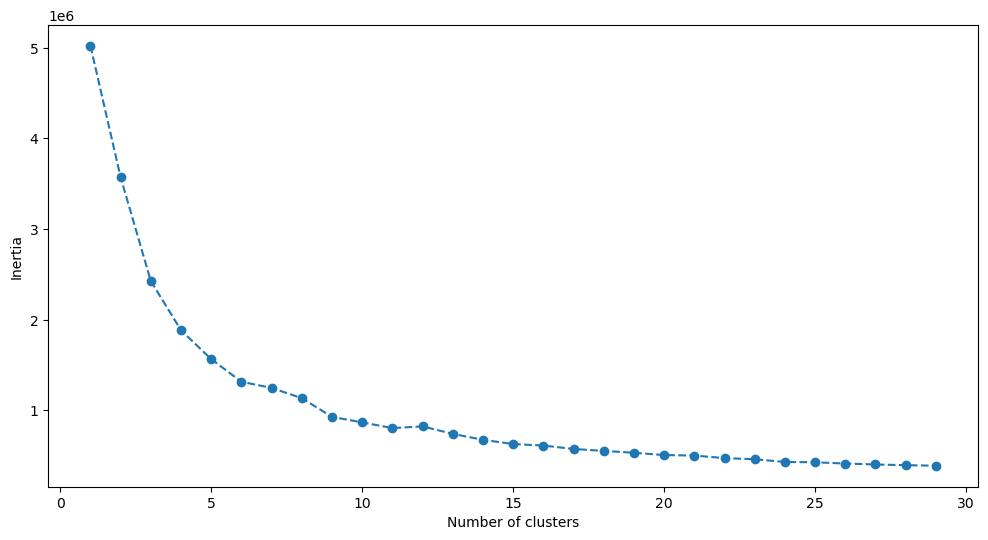

In [21]:
"""Use elbow method to determine the optimal number of clusters"""
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,30):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,30), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [22]:
# Create cluster of n-clusters
kmeans = KMeans(n_clusters=4, init='k-means++')

# fit the k means algorithm on scaled data
kmeans.fit(data_scaled)
# inertia on the fitted data
kmeans.inertia_

1893390.3569604945

In [23]:
# Create cluster of n-clusters
kmeans = KMeans(n_clusters=12, init='k-means++')

# fit the k means algorithm on scaled data
kmeans.fit(data_scaled)
# inertia on the fitted data
kmeans.inertia_

762940.5503341694

12 clusters is considered optimal, but for a finer separation, 16 clusters will be used

In [24]:
# Create cluster of n-clusters
kmeans = KMeans(n_clusters=16, init='k-means++')

# fit the k means algorithm on scaled data
kmeans.fit(data_scaled)
# inertia on the fitted data
kmeans.inertia_

652238.8493761349

In [25]:
pred = kmeans.predict(data_scaled)
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

cluster
1     291022
7     206493
0     143935
14    132150
4     129649
2      95875
13     90222
10     86625
6      82592
15     76581
8      75674
11     67376
9      60001
3      58718
12     43518
5      34031
Name: count, dtype: int64

#### Change Classifications
We will now use the clusters to label the data points in the original dataset.

##### Determine cluster statistics

In [26]:
features = frame.columns[:-1]  # all columns except 'cluster'

# Compute basic statistics for each cluster
cluster_stats = frame.groupby('cluster')[features].describe()
cluster_stats


0                                                              \
            count      mean       std       min       25%       50%       75%   
cluster                                                                         
0        143935.0 -0.349521  0.285407 -0.733677 -0.573583 -0.466855 -0.210705   
1        291022.0 -0.512950  0.197373 -0.733677 -0.621611 -0.573583 -0.525555   
2         95875.0  2.624756  0.813465  1.246143  1.934544  2.254731  3.268655   
3         58718.0 -0.250376  0.473360 -0.733677 -0.573583 -0.466855 -0.119986   
4        129649.0 -0.434392  0.292610 -0.733677 -0.573583 -0.530892 -0.413490   
5         34031.0 -0.136991  0.546546 -0.733677 -0.573583 -0.370799  0.136163   
6         82592.0 -0.379077  0.307067 -0.733677 -0.573583 -0.525555 -0.301425   
7        206493.0 -0.268441  0.341820 -0.733677 -0.573583 -0.376135 -0.141332   
8         75674.0 -0.487955  0.233847 -0.733677 -0.573583 -0.573583 -0.514883   
9         60001.0  1.219812  0.491625  0.280247  0.813891  1.134078  1.577003   
10        86625.0 -0.423384  0.242865 -0.733677 -0.573583 -0.546901 -0.333443   
11        67376.0  2.126931  0.605204  0.925957  1.934544  1.934544  2.110647   
12        43518.0  1.886214  0.480250  0.712499  1.833152  1.934544  1.934544   
13        90222.0 -0.257409  0.349575 -0.733677 -0.573583 -0.328641 -0.168014   
14       132150.0 -0.456383  0.231912 -0.733677 -0.573583 -0.530892 -0.434836   
15        76581.0 -0.405857  0.285760 -0.723004 -0.573583 -0.541565 -0.359592   

                          1            ...                             2  \
              max     count      mean  ...       75%       max     count   
cluster                                ...                                 
0        0.803219  143935.0  0.713474  ...  0.990975  1.243973  143935.0   
1        0.653798  291022.0 -0.174897  ... -0.021019  0.340407  291022.0   
2        4.442672   95875.0 -0.166577  ... -0.093304  1.786112   95875.0   
3        1.966563   58718.0  0.125760  ...  0.376550  1.171688   58718.0   
4        1.416909  129649.0 -1.549033  ... -1.105297 -0.816156  129649.0   
5        1.993245   34031.0 -1.248364  ... -0.852299 -0.346302   34031.0   
6        1.246143   82592.0  0.012341  ...  0.268122  0.737976   82592.0   
7        0.872592  206493.0 -0.219341  ... -0.093304  0.340407  206493.0   
8        1.523638   75674.0  1.635761  ...  1.786112  2.255966   75674.0   
9        2.777702   60001.0 -0.202212  ... -0.021019  1.424686   60001.0   
10       0.989994   86625.0  1.631506  ...  1.786112  2.255966   86625.0   
11       4.442672   67376.0 -1.487371  ... -1.105297 -0.527015   67376.0   
12       4.442672   43518.0  0.976200  ...  1.424686  2.255966   43518.0   
13       0.947302   90222.0 -1.531280  ... -1.105297 -0.852299   90222.0   
14       1.107396  132150.0  0.686276  ...  0.954832  1.207830  132150.0   
15       1.571666   76581.0  1.261302  ...  1.496971  2.255966   76581.0   

                                                                               
             mean       std       min       25%       50%       75%       max  
cluster                                                                        
0        0.336022  0.278580 -0.399971  0.234867  0.358537  0.391516  1.121168  
1       -1.064831  0.245612 -1.496511 -1.197230 -1.125501 -0.960608 -0.342259  
2        0.453864  0.625166 -1.496511  0.358537  0.358537  0.358537  2.625818  
3        2.141860  0.288510  1.467443  1.896166  2.131138  2.390845  2.629940  
4       -1.028421  0.270148 -1.496511 -1.228559 -1.026565 -0.927629 -0.313815  
5        1.752321  0.448630  0.861461  1.376752  1.706538  2.110527  2.625818  
6        1.179400  0.261420  0.618244  0.968642  1.166513  1.384997  1.768373  
7        0.267353  0.247319 -0.531886  0.218378  0.358537  0.358537  0.972764  
8       -0.954830  0.305393 -1.496511 -1.176618 -0.960608 -0.758614 -0.280012  
9       -0.340059  0.665105 -1.496511 -0.960608 -0.329892  0.358537  1.

##### Get the data used right before clustering

In [27]:
df_cluster = df_cluster.reset_index(drop=True)
df_cluster

,Ammonia (mg/l),pH (ph units),Nitrate (mg/l)
0,0.05152,8.3700,9.73940
1,0.07728,8.0167,8.72119
2,0.09016,7.7900,9.51805
3,0.10304,8.1583,8.63265
4,0.10304,7.7900,8.76546
...,...,...,...
1674457,0.02400,7.9000,0.37000
1674458,0.03800,7.9000,0.54000
1674459,0.03500,7.6000,0.79000
1674460,0.04600,8.0000,1.30000


##### Get cluster frame into the dataframe

In [28]:
#make a copy of the original dataframe before any filtering
df_original = df_cluster.copy()
df_original['cluster'] = frame['cluster'].values

In [29]:
#feature_names is in the code block for removing the columns earlier
cluster_stats_unscaled = df_original.groupby('cluster')[feature_names].describe()
cluster_stats_unscaled

Ammonia (mg/l)                                                    \
                 count      mean       std    min    25%     50%     75%   
cluster                                                                    
0             143935.0  0.071987  0.053483  0.000  0.030  0.0500  0.0980   
1             291022.0  0.041362  0.036986  0.000  0.021  0.0300  0.0390   
2              95875.0  0.629339  0.152436  0.371  0.500  0.5600  0.7500   
3              58718.0  0.090566  0.088703  0.000  0.030  0.0500  0.1150   
4             129649.0  0.056083  0.054832  0.000  0.030  0.0380  0.0600   
5              34031.0  0.111813  0.102418  0.000  0.030  0.0680  0.1630   
6              82592.0  0.066449  0.057541  0.000  0.030  0.0390  0.0810   
7             206493.0  0.087181  0.064054  0.000  0.030  0.0670  0.1110   
8              75674.0  0.046046  0.043821  0.000  0.030  0.0300  0.0410   
9              60001.0  0.366066  0.092126  0.190  0.290  0.3500  0.4330   
10             86625.0  0.058146  0.045511  0.000  0.030  0.0350  0.0750   
11             67376.0  0.536051  0.113410  0.311  0.500  0.5000  0.5330   
12             43518.0  0.490943  0.089994  0.271  0.481  0.5000  0.5000   
13             90222.0  0.089248  0.065507  0.000  0.030  0.0759  0.1060   
14            132150.0  0.051962  0.043458  0.000  0.030  0.0380  0.0560   
15             76581.0  0.061430  0.053549  0.002  0.030  0.0360  0.0701   

               pH (ph units)            ...             Nitrate (mg/l)  \
           max         count      mean  ...   75%   max          count   
cluster                                 ...                              
0        0.288      143935.0  8.003221  ...  8.08  8.15       143935.0   
1        0.260      291022.0  7.757425  ...  7.80  7.90       291022.0   
2        0.970       95875.0  7.759727  ...  7.78  8.30        95875.0   
3        0.506       58718.0  7.840611  ...  7.91  8.13        58718.0   
4        0.403      129649.0  7.377226  ...  7.50  7.58       129649.0   
5        0.511       34031.0  7.460416  ...  7.57  7.71        34031.0   
6        0.371       82592.0  7.809230  ...  7.88  8.01        82592.0   
7        0.301      206493.0  7.745128  ...  7.78  7.90       206493.0   
8        0.423       75674.0  8.258401  ...  8.30  8.43        75674.0   
9        0.658       60001.0  7.749867  ...  7.80  8.20        60001.0   
10       0.323       86625.0  8.257223  ...  8.30  8.43        86625.0   
11       0.970       67376.0  7.394287  ...  7.50  7.66        67376.0   
12       0.970       43518.0  8.075912  ...  8.20  8.43        43518.0   
13       0.315       90222.0  7.382138  ...  7.50  7.57        90222.0   
14       0.345      132150.0  7.995695  ...  8.07  8.14       132150.0   
15       0.432       76581.0  8.154795  ...  8.22  8.43        76581.0   

                                                                
             mean       std   min    25%   50%   75%       max  
cluster                                                         
0        4.445383  0.675782  2.66  4.200  4.50  4.58   6.35000  
1        1.047175  0.595809  0.00  0.726  0.90  1.30   2.80000  
2        4.731246  1.516536  0.00  4.500  4.50  4.50  10.00000  
3        8.826008  0.699871  7.19  8.230  8.80  9.43  10.01000  
4        1.135499  0.655328  0.00  0.650  1.14  1.38   2.86900  
5        7.881060  1.088292  5.72  6.970  7.77  8.75  10.00000  
6        6.491260  0.634156  5.13  5.980  6.46  6.99   7.92000  
7        4.278805  0.599949  2.34  4.160  4.50  4.50   5.99000  
8        1.314016  0.740827  0.00  0.776  1.30  1.79   2.95100  
9        2.805336  1.613421  0.00  1.300  2.83  4.50   6.67000  
10       4.542783  0.744829  2.79  4.290  4.50  4.84   6.66000  
11       4.412280  1.468474  0.00  4.500  4.50  4.50  10.00000  
12       4.734382  1.555496  0.00  4.500  4.50  4.50  10.01564  
13       4.380934  0.719841  2.38  4.120  4.50  4.50   6.68000  
14       1.349588  0.716588  0.00  0.877  1.30  1.8

##### Label data points based on cluster metrics

In [30]:
cluster_stats_unscaled = df_original.groupby('cluster').agg({
    'pH (ph units)': ['std'],
    'Ammonia (mg/l)': ['mean'],
    'Nitrate (mg/l)': ['mean']
})

# Flatten the MultiIndex columns
cluster_stats_unscaled.columns = [
    'pH_std', 'Ammonia_mean', 'Nitrate_mean'
]

# Lower BOD, NH3, NO3 preferred; higher DO preferred; lower pH variance preferred.
cluster_stats_unscaled['score'] = (
# negative for lower is better
# positive for higher is better
    - cluster_stats_unscaled['Nitrate_mean']
    - cluster_stats_unscaled['Ammonia_mean']
    - cluster_stats_unscaled['pH_std']    # negative for more stable pH
)

cluster_means = cluster_stats_unscaled.sort_values('score', ascending=False)
labels = []
for idx, row in enumerate(cluster_means.itertuples()):
    if idx < 4:
        labels.append(f'A{idx+1}')
    elif idx < 8:
        labels.append(f'B{idx-3}')
    elif idx < 12:
        labels.append(f'C{idx-7}')
    else:
        labels.append(f'D{idx-11}')
cluster_means['label'] = labels
cluster_means

# Assuming your clusters are 0-15 and labels are in same order
cluster_label_map = dict(zip(cluster_means.index, cluster_means['label']))
df_original['class_label'] = df_original['cluster'].map(cluster_label_map)


df_original['class_label'].value_counts().sort_index()


class_label
A1    291022
A2    129649
A3     75674
A4    132150
B1     60001
B2    206493
B3     90222
B4    143935
C1     86625
C2     67376
C3     43518
C4     95875
D1     82592
D2     76581
D3     34031
D4     58718
Name: count, dtype: int64

In [31]:
cluster_means = cluster_stats_unscaled.sort_values('score', ascending=False)
cluster_means

,pH_std,Ammonia_mean,Nitrate_mean,score
cluster,,,,
1,0.070663,0.041362,1.047175,-1.159200
4,0.115417,0.056083,1.135499,-1.306999
8,0.080833,0.046046,1.314016,-1.440895
14,0.076815,0.051962,1.349588,-1.478365
9,0.122387,0.366066,2.805336,-3.293789
7,0.072822,0.087181,4.278805,-4.438808
13,0.115371,0.089248,4.380934,-4.585553
0,0.074765,0.071987,4.445383,-4.592135
10,0.080686,0.058146,4.542783,-4.681614


##### Reclassification done!

In [32]:
#take a look at the reclassified data
ordered_labels = ['A1', 'A2', 'A3', 'A4',
                  'B1', 'B2', 'B3', 'B4',
                  'C1', 'C2', 'C3', 'C4',
                  'D1', 'D2', 'D3', 'D4']

subset = df_original.groupby("class_label").head(1)
subset.set_index('class_label').reindex(ordered_labels).reset_index()
subset


,Ammonia (mg/l),pH (ph units),Nitrate (mg/l),cluster,class_label
0,0.051520,8.370000,9.739400,15,D2
1,0.077280,8.016700,8.721190,3,D4
7,0.094024,7.790000,3.023641,7,B2
8,0.014039,8.327270,5.836820,10,C1
9,0.046368,7.619440,5.825932,6,D1
10,0.097888,8.337500,1.651271,8,A3
13,0.055813,7.790000,2.331555,1,A1
18,0.069552,8.001700,0.447127,14,A4
22,0.303066,7.790000,0.451997,9,B1
28,0.455093,7.880000,6.654135,12,C3


            ## Load

### Export into a Parquet file

Exporting the resulting dataframe into a more efficient data format compared to CSV is essential to reduce the training time.

In [33]:
df_model = df_original.copy()
parquet_path = "C:/Users/Leon/Documents/Github/CPE025A/df_parquet.parquet"
df_model.to_parquet(parquet_path)
print(f"Saved preprocessed data to {parquet_path}")

Saved preprocessed data to C:/Users/Leon/Documents/Github/CPE025A/df_parquet.parquet


### Prepare for modelling

In [46]:
df_parquet = pd.read_parquet(parquet_path)
df_parquet.groupby('class_label').head(1)


,Ammonia (mg/l),pH (ph units),Nitrate (mg/l),cluster,class_label
0,0.051520,8.370000,9.739400,15,D2
1,0.077280,8.016700,8.721190,3,D4
7,0.094024,7.790000,3.023641,7,B2
8,0.014039,8.327270,5.836820,10,C1
9,0.046368,7.619440,5.825932,6,D1
10,0.097888,8.337500,1.651271,8,A3
13,0.055813,7.790000,2.331555,1,A1
18,0.069552,8.001700,0.447127,14,A4
22,0.303066,7.790000,0.451997,9,B1
28,0.455093,7.880000,6.654135,12,C3


In [35]:
print("Number of datapoints (rows):", df_parquet.shape[0])

Number of datapoints (rows): 1674462


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = df_parquet.drop(columns=['cluster','class_label'], axis=1)
y = df_parquet['cluster']

# Split sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [37]:
y.value_counts()

cluster
1     291022
7     206493
0     143935
14    132150
4     129649
2      95875
13     90222
10     86625
6      82592
15     76581
8      75674
11     67376
9      60001
3      58718
12     43518
5      34031
Name: count, dtype: int64

# Training of Machine Learning Models

### RandomForest

#### Baseline Model

In [51]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Initialize Random Forest with multiple cores and 300 trees
rf = RandomForestClassifier(n_estimators=400, 
                            random_state=42, 
                            n_jobs=-1,
                            class_weight='balanced',
                            min_samples_split= 5, 
                            min_samples_leaf= 10, 
                            max_depth= 10)

# Measure training time
start_time_train = time.time()
rf.fit(X_train, y_train)
print("Training finished!")
end_time_train = time.time()

train_preds = rf.predict(X_train)            # Training predictions
start_time_predict = time.time()
predictions = rf.predict(X_test)
end_time_predict = time.time()

print("Classification Report:\n", classification_report(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("Random Forest Train Accuracy:", accuracy_score(y_train, train_preds))
print("Random Forest Test Accuracy:", accuracy_score(y_test, predictions))
print(f"Random Forest training time: {end_time_train - start_time_train:.2f} seconds")
print(f"Random Forest prediction time: {end_time_predict - start_time_predict:.2f} seconds")



Training finished!
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     31197
           1       0.98      0.99      0.99     16527
           2       0.98      0.99      0.99     17863
           3       0.99      0.99      0.99      7510
           4       0.99      0.99      0.99     18144
           5       0.99      0.99      0.99     16813
           6       0.99      0.99      0.99     31703
           7       0.99      0.97      0.98     36704
           8       1.00      1.00      1.00     26743
           9       1.00      1.00      1.00     65421
          10       0.97      0.99      0.98      8849
          11       0.98      0.99      0.98     11806
          12       0.98      0.99      0.98      6484
          13       0.99      0.99      0.99      8868
          14       0.98      0.99      0.98     20758
          15       0.97      0.98      0.98      9503

    accuracy                         

In [78]:
import time
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# List of n_estimators to try
n_values = range(100, 1100, 150)

# Store results
accuracies = []
train_times = []
predict_times = []

for n in n_values:
    # Initialize RF with n trees and all cores
    rf = RandomForestClassifier(n_estimators=n, 
                                random_state=42, 
                                n_jobs=-1,
                                class_weight='balanced',
                                min_samples_split= 5, 
                                min_samples_leaf= 10, 
                                max_depth= 10)
    
    # Train
    start_time_train = time.time()
    rf.fit(X_train, y_train)
    end_time_train = time.time()
    
    # Predict
    start_time_predict = time.time()
    preds = rf.predict(X_test)
    end_time_predict = time.time()
    
    # Evaluate
    acc = accuracy_score(y_test, preds)
    accuracies.append(acc)
    
    # Save times
    train_times.append(end_time_train - start_time_train)
    predict_times.append(end_time_predict - start_time_predict)
    
    print(f"n_estimators={n}: Accuracy={acc:.4f}, Train={train_times[-1]:.2f}s, Predict={predict_times[-1]:.2f}s")

# Summarize results in a DataFrame
results = pd.DataFrame({
    'n_estimators': n_values,
    'accuracy': accuracies,
    'train_time_s': train_times,
    'predict_time_s': predict_times
})

print(results)


n_estimators=100: Accuracy=0.9726, Train=40.32s, Predict=1.45s
n_estimators=250: Accuracy=0.9726, Train=100.46s, Predict=3.70s
n_estimators=400: Accuracy=0.9728, Train=149.16s, Predict=5.70s
n_estimators=550: Accuracy=0.9727, Train=203.95s, Predict=8.28s
n_estimators=700: Accuracy=0.9727, Train=255.59s, Predict=9.77s
n_estimators=850: Accuracy=0.9727, Train=318.82s, Predict=11.71s
n_estimators=1000: Accuracy=0.9727, Train=370.43s, Predict=15.41s
   n_estimators  accuracy  train_time_s  predict_time_s
0           100  0.972648     40.323727        1.452980
1           250  0.972591    100.462992        3.703194
2           400  0.972758    149.157042        5.698039
3           550  0.972666    203.946453        8.282925
4           700  0.972660    255.586491        9.767249
5           850  0.972705    318.824050       11.709283
6          1000  0.972708    370.433344       15.408211


#### Hyperparameter Optimization

In [2]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import time


# Hyperparameter distribution
param_dist = {
    'n_estimators': [300, 600, 700, 1500],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_depth': [5,10,20]
}

# Randomized Search CV
random_search = RandomizedSearchCV(
    estimator= RandomForestClassifier(n_estimators=n, random_state=42, n_jobs=-1, class_weight='balanced'),
    param_distributions=param_dist,
    n_iter=6,         # try 10 random combinations
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2,         # prints status after each iteration
    random_state=42
)

# Fit randomized search
start_time = time.time()
random_search.fit(X_train, y_train)
end_time = time.time()

print(f"\nRandomized Search finished in {end_time - start_time:.2f} seconds")
print("Best parameters found:", random_search.best_params_)
print("Best cross-validation accuracy:", random_search.best_score_)

# Evaluate on test set
best_rf = random_search.best_estimator_
predictions = best_rf.predict(X_test)

print("\nTest Set Evaluation:")
print("Classification Report:\n", classification_report(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("Random Forest Accuracy:", accuracy_score(y_test, predictions))


### KNN

#### Baseline Model

In [52]:
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize KNN (default k=5)
knn = KNeighborsClassifier(n_neighbors=69)

# Measure training time
start_time_train = time.time()
knn.fit(X_train_scaled, y_train)
print("Training finished!")
end_time_train = time.time()

# Predictions'
start_time_predict = time.time()
predictions = knn.predict(X_test_scaled)
end_time_predict = time.time()

# Evaluation metrics
print("Classification Report:\n", classification_report(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("KNN Accuracy:", accuracy_score(y_test, predictions))
print(f"KNN training time: {end_time_train - start_time_train:.2f} seconds")
print(f"KNN prediction time: {end_time_predict - start_time_predict:.2f} seconds")

Training finished!
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     31197
           1       0.98      0.99      0.99     16527
           2       0.99      0.99      0.99     17863
           3       0.99      0.99      0.99      7510
           4       0.99      0.98      0.99     18144
           5       0.99      0.99      0.99     16813
           6       0.99      0.99      0.99     31703
           7       0.99      0.98      0.98     36704
           8       1.00      0.99      0.99     26743
           9       0.99      1.00      1.00     65421
          10       0.99      0.98      0.98      8849
          11       0.99      0.98      0.98     11806
          12       0.99      0.99      0.99      6484
          13       0.99      0.98      0.99      8868
          14       0.98      0.99      0.99     20758
          15       0.98      0.98      0.98      9503

    accuracy                         

#### Hyperparameter Optimization

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import time

# Initialize KNN
knn = KNeighborsClassifier()

# Define hyperparameter distribution
param_dist = {
    'n_neighbors': range(31, 99),                  
    'weights': ['uniform', 'distance'],           
    'metric': ['euclidean', 'manhattan', 'minkowski']  
}

# Randomized search with verbose output
random_search = RandomizedSearchCV(
    knn,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=2  # <-- This will print status of each iteration
)

# Fit randomized search on training data
start_time = time.time()
random_search.fit(X_train_scaled, y_train)
end_time = time.time()

print(f"\nRandomized Search finished in {end_time - start_time:.2f} seconds")
print("Best parameters found:", random_search.best_params_)
print("Best cross-validation accuracy:", random_search.best_score_)

# Evaluate on test set
best_knn = random_search.best_estimator_
predictions = best_knn.predict(X_test_scaled)

print("\nTest Set Evaluation:")
print("Classification Report:\n", classification_report(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("KNN Accuracy:", accuracy_score(y_test, predictions))


### CatBoost

#### Baseline Model

Training finished!
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     21143
           1       0.99      0.99      0.99     31781
           2       0.97      0.97      0.97     10030
           3       0.99      0.99      0.99     34327
           4       0.98      0.97      0.98      6581
           5       0.98      0.98      0.98     38356
           6       0.98      0.99      0.99      8918
           7       0.99      0.99      0.99     56233
           8       0.99      0.98      0.98     24194
           9       0.99      0.99      0.99     17592
          10       0.97      0.97      0.97     11711
          11       0.98      0.98      0.98     18180
          12       0.98      0.98      0.98     19584
          13       0.98      0.97      0.98      7111
          14       0.99      0.99      0.99      7630
          15       0.96      0.95      0.95     21522

    accuracy                         

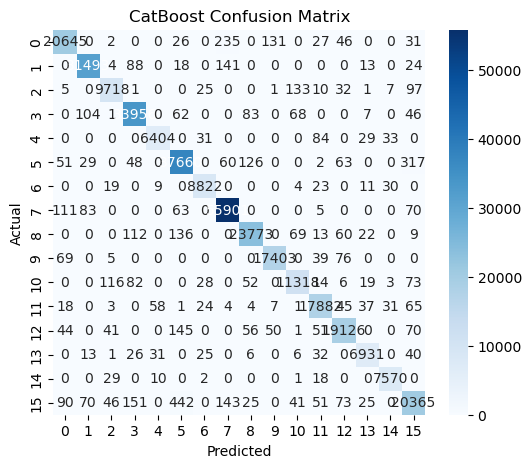

In [86]:
import time
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize CatBoost
cb = CatBoostClassifier(
    iterations=200,
    learning_rate=0.05,
    depth=10,
    eval_metric='MultiClass',
    grow_policy= 'SymmetricTree',
    verbose=0,
    random_state=42
)

# Measure training time
start_time_train = time.time()
cb.fit(X_train, y_train)
print("Training finished!")
end_time_train = time.time()

# Predictions
train_preds = cb.predict(X_train)
start_time_predict = time.time()
predictions = cb.predict(X_test)
end_time_predict = time.time()

# Metrics
print("Classification Report:\n", classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", cm)

print("CatBoost Train Accuracy:", accuracy_score(y_train, train_preds))
print("CatBoost Test Accuracy:", accuracy_score(y_test, predictions))
print(f"CatBoost training time: {end_time_train - start_time_train:.2f} seconds")
print(f"CatBoost prediction time: {end_time_predict - start_time_predict:.2f} seconds")

#Confusion Matrix Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=cb.classes_,
            yticklabels=cb.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("CatBoost Confusion Matrix")
plt.show()


#### Hyperparameter Optimization

Stratified samples selected: 20000
Class distribution:
 cluster
7     0.16880
5     0.11465
3     0.10175
1     0.09450
8     0.07150
15    0.06500
0     0.06320
12    0.05880
11    0.05415
9     0.05240
10    0.03490
2     0.02950
6     0.02685
14    0.02300
13    0.02130
4     0.01970
Name: proportion, dtype: float64
Fitting 3 folds for each of 10 candidates, totalling 30 fits

Randomized Search finished in 1261.40 seconds
Best parameters found: {'random_strength': 1, 'min_data_in_leaf': 10, 'learning_rate': 0.075, 'l2_leaf_reg': 9, 'iterations': 1000, 'grow_policy': 'SymmetricTree', 'depth': 10, 'border_count': 254, 'bagging_temperature': 0}
Best cross-validation accuracy: 0.9768998573773682

Test Set Evaluation:
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98     21143
           1       0.99      0.99      0.99     31781
           2       0.97      0.96      0.97     10030
           3       0.98      0.99

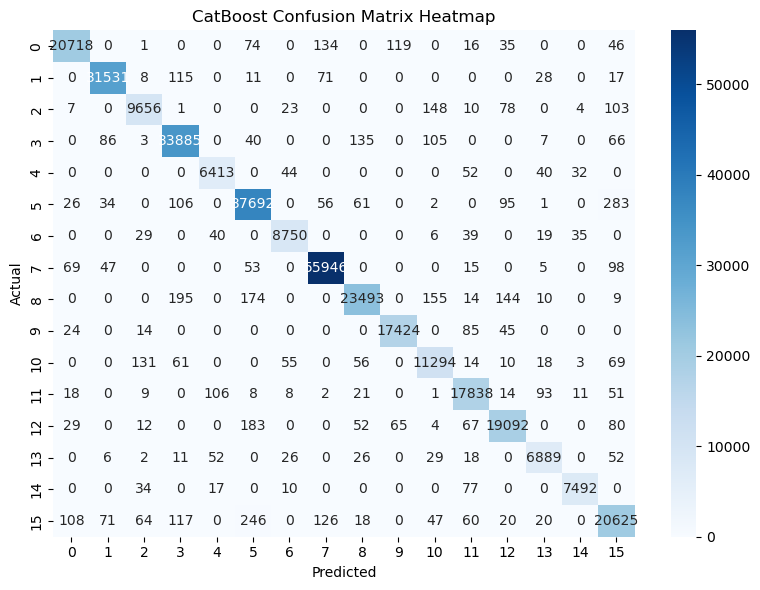

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

max_samples = 20_000

if len(X_train) > max_samples:
    # Stratified sampling
    X_train_sub, _, y_train_sub, _ = train_test_split(
        X_train,
        y_train,
        train_size=max_samples,
        stratify=y_train,
        random_state=42
    )
else:
    X_train_sub = X_train
    y_train_sub = y_train

print("Stratified samples selected:", len(X_train_sub))
print("Class distribution:\n", y_train_sub.value_counts(normalize=True))

# Initialize CatBoost
cb = CatBoostClassifier(
    eval_metric='MultiClass',
    verbose=0,
    random_state=42
)

# Hyperparameter distribution
param_dist = {
    'iterations': [200, 500, 700, 1000],
    'learning_rate': [0.01, 0.03, 0.05, 0.075,0.1],
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [1, 3, 5, 7, 9, 12],
    'bagging_temperature': [0, 0.25, 0.5, 1, 2],
    'border_count': [32, 64, 128, 254],
    'random_strength': [1, 5, 10, 20],
    'grow_policy': ['SymmetricTree', 'Depthwise', 'Lossguide'],
    'min_data_in_leaf': [1, 5, 10, 20, 50]
}


# Random search
random_search = RandomizedSearchCV(
    estimator=cb,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit randomized search on **subsample**
start_time = time.time()
random_search.fit(X_train_sub, y_train_sub)
end_time = time.time()

print(f"\nRandomized Search finished in {end_time - start_time:.2f} seconds")
print("Best parameters found:", random_search.best_params_)
print("Best cross-validation accuracy:", random_search.best_score_)

# Evaluate on test set
best_cb = random_search.best_estimator_
predictions = best_cb.predict(X_test)

print("\nTest Set Evaluation:")
print("Classification Report:\n", classification_report(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("CatBoost Accuracy:", accuracy_score(y_test, predictions))

#Confusion Matrix Heatmap
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("CatBoost Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


### XGBoost

#### Baseline Model

Training finished!
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     21143
           1       1.00      1.00      1.00     31781
           2       0.98      0.98      0.98     10030
           3       0.99      0.99      0.99     34327
           4       0.98      0.98      0.98      6581
           5       0.99      0.99      0.99     38356
           6       0.99      0.99      0.99      8918
           7       1.00      1.00      1.00     56233
           8       0.99      0.99      0.99     24194
           9       1.00      1.00      1.00     17592
          10       0.98      0.98      0.98     11711
          11       0.98      0.99      0.99     18180
          12       0.99      0.99      0.99     19584
          13       0.99      0.99      0.99      7111
          14       0.99      0.99      0.99      7630
          15       0.98      0.97      0.98     21522

    accuracy                         

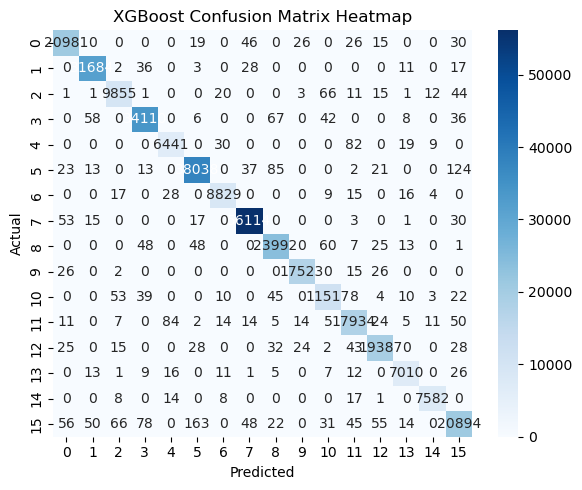

In [87]:
import time
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize XGBoost
xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.075,     # FIXED
    max_depth=8,
    objective='multi:softprob',  
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

# Train model
start_time_train = time.time()
xgb.fit(X_train, y_train)
end_time_train = time.time()
print("Training finished!")

# Predictions
train_preds = xgb.predict(X_train)
start_time_predict = time.time()
predictions = xgb.predict(X_test)
probs = xgb.predict_proba(X_test)   # FIXED
end_time_predict = time.time()

# Evaluation
print("Classification Report:\n", classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", cm)

print("XGBoost Train Accuracy:", accuracy_score(y_train, train_preds))
print("XGBoost Test Accuracy:", accuracy_score(y_test, predictions))
print(f"Training time: {end_time_train - start_time_train:.2f} seconds")
print(f"Prediction time: {end_time_predict - start_time_predict:.2f} seconds")

# Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("XGBoost Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


#### Hyperparameter Optimization

Using training samples: 10000
Class distribution:
cluster
7     0.1688
5     0.1146
3     0.1018
1     0.0945
8     0.0715
15    0.0650
0     0.0632
12    0.0588
11    0.0542
9     0.0524
10    0.0349
2     0.0295
6     0.0268
14    0.0230
13    0.0213
4     0.0197
Name: proportion, dtype: float64
Fitting 3 folds for each of 10 candidates, totalling 30 fits

Randomized Search done in 16.67 seconds
Best parameters: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Best CV accuracy: 0.9630998492770694

Training finished!

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     21143
           1       0.98      0.99      0.99     31781
           2       0.95      0.95      0.95     10030
           3       0.97      0.98      0.97     34327
           4       0.94      0.96      0.95      6581
           5       0.97      0.97      0.97     38356
           6      

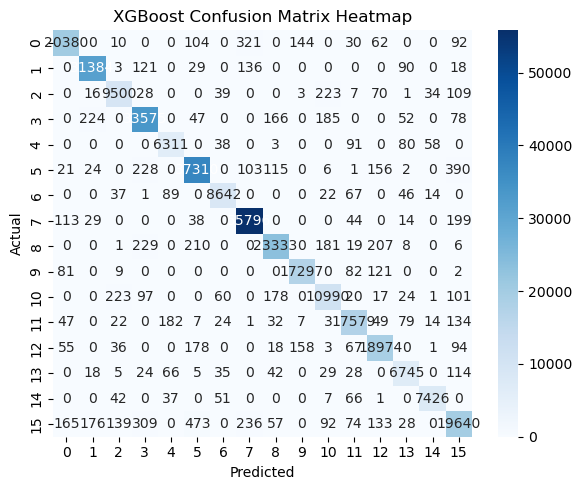

In [ ]:
import time
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# ----------------------------------------------------------
# 1) STRATIFIED SAMPLING (10,000 rows max)
# ----------------------------------------------------------
max_samples = 10_000

if len(X_train) > max_samples:
    X_train_sub, _, y_train_sub, _ = train_test_split(
        X_train,
        y_train,
        train_size=max_samples,
        stratify=y_train,
        random_state=42
    )
else:
    X_train_sub = X_train
    y_train_sub = y_train

print("Using training samples:", len(X_train_sub))
print("Class distribution:")
print(y_train_sub.value_counts(normalize=True))

# ----------------------------------------------------------
# 2) DEFINE BASE MODEL (RandomSearch will overwrite params)
# ----------------------------------------------------------
xgb = XGBClassifier(
    objective='multi:softprob',
    eval_metric='logloss',
    n_jobs=-1,
    random_state=42
)

# ----------------------------------------------------------
# 3) DEFINE HYPERPARAMETER SEARCH SPACE
# ----------------------------------------------------------
param_dist = {
    'n_estimators': [100, 200, 400],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'max_depth': [4, 6, 8, 10],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# ----------------------------------------------------------
# 4) RANDOM SEARCH
# ----------------------------------------------------------
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=10,
    scoring='accuracy',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

start_time = time.time()
random_search.fit(X_train_sub, y_train_sub)
end_time = time.time()

print(f"\nRandomized Search done in {end_time - start_time:.2f} seconds")
print("Best parameters:", random_search.best_params_)
print("Best CV accuracy:", random_search.best_score_)

# ----------------------------------------------------------
# 5) TRAIN BEST MODEL ON FULL TRAINING DATA
# ----------------------------------------------------------
best_xgb = random_search.best_estimator_

start_time_train = time.time()
best_xgb.fit(X_train_sub, y_train_sub)
end_time_train = time.time()

print("\nTraining finished!")

# ----------------------------------------------------------
# 6) PREDICTIONS
# ----------------------------------------------------------
start_time_predict = time.time()
predictions = best_xgb.predict(X_test)
probs = best_xgb.predict_proba(X_test)
end_time_predict = time.time()

train_preds = best_xgb.predict(X_train_sub)

# ----------------------------------------------------------
# 7) EVALUATION METRICS
# ----------------------------------------------------------
print("\nClassification Report:")
print(classification_report(y_test, predictions))

cm = confusion_matrix(y_test, predictions)
print("\nConfusion Matrix:\n", cm)

print("XGBoost Train Accuracy:", accuracy_score(y_train_sub, train_preds))
print("XGBoost Test Accuracy:", accuracy_score(y_test, predictions))

print(f"Training time: {end_time_train - start_time_train:.2f} sec")
print(f"Prediction time: {end_time_predict - start_time_predict:.2f} sec")

# ----------------------------------------------------------
# 8) CONFUSION MATRIX HEATMAP
# ----------------------------------------------------------
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("XGBoost Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


### LightGBM

#### Baseline Model

Training finished!
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     21143
           1       1.00      1.00      1.00     31781
           2       0.99      0.99      0.99     10030
           3       1.00      1.00      1.00     34327
           4       0.99      0.99      0.99      6581
           5       1.00      1.00      1.00     38356
           6       0.99      0.99      0.99      8918
           7       1.00      1.00      1.00     56233
           8       0.99      0.99      0.99     24194
           9       1.00      1.00      1.00     17592
          10       0.99      0.99      0.99     11711
          11       0.99      0.99      0.99     18180
          12       0.99      0.99      0.99     19584
          13       0.99      0.99      0.99      7111
          14       1.00      0.99      1.00      7630
          15       0.99      0.99      0.99     21522

    accuracy                         

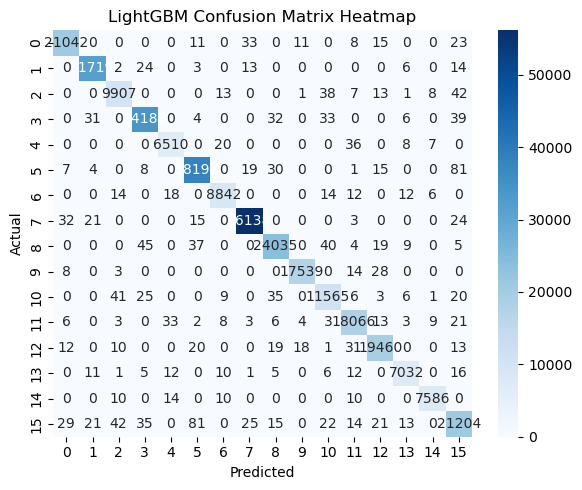

In [ ]:
    import time
    import lightgbm as lgb
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Initialize LightGBM
    lgbm = lgb.LGBMClassifier(
        n_estimators=200,
        learning_rate=0.1,
        num_leaves=63,
        max_depth=10,
        objective='multiclass',
        min_child_samples=50,
        random_state=42,
        n_jobs=-1,
        verbose=-1
    )

    # Measure training time
    start_time_train = time.time()
    lgbm.fit(X_train, y_train)
    end_time_train = time.time()
    print("Training finished!")

    # Predictions and probabilities
    start_time_predict = time.time()
    predictions = lgbm.predict(X_test)
    probs = lgbm.predict_proba(X_test)[:, 1]
    end_time_predict = time.time()

    # Evaluation metrics
    print("Classification Report:\n", classification_report(y_test, predictions))
    cm = confusion_matrix(y_test, predictions)
    print("Confusion Matrix:\n", cm)

    train_preds = lgbm.predict(X_train)
    print("LightGBM Train Accuracy:", accuracy_score(y_train, train_preds))
    print("LightGBM Test Accuracy:", accuracy_score(y_test, predictions))
    print(f"LightGBM training time: {end_time_train - start_time_train:.2f} seconds")
    print(f"LightGBM prediction time: {end_time_predict - start_time_predict:.2f} seconds")


    #Ciconfusion Matrix Heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("LightGBM Confusion Matrix Heatmap")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()


#### Hyperparameter Optimization

Using training samples: 10000
Class distribution:
cluster
7     0.1688
5     0.1146
3     0.1018
1     0.0945
8     0.0715
15    0.0650
0     0.0632
12    0.0588
11    0.0542
9     0.0524
10    0.0349
2     0.0295
6     0.0268
14    0.0230
13    0.0213
4     0.0197
Name: proportion, dtype: float64
Running RandomizedSearchCV...
Fitting 3 folds for each of 10 candidates, totalling 30 fits

Randomized Search Completed!
Total time: 255.64 seconds
Best Parameters Found: {'subsample': 0.7, 'num_leaves': 63, 'n_estimators': 200, 'min_child_samples': 50, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 0.9}
Best CV Accuracy: 0.9617999292430742
Training final model with best parameters...
Final model training complete!
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     21143
           1       1.00      1.00      1.00     31781
           2       0.99      0.99      0.99     10030
           3       1.00      

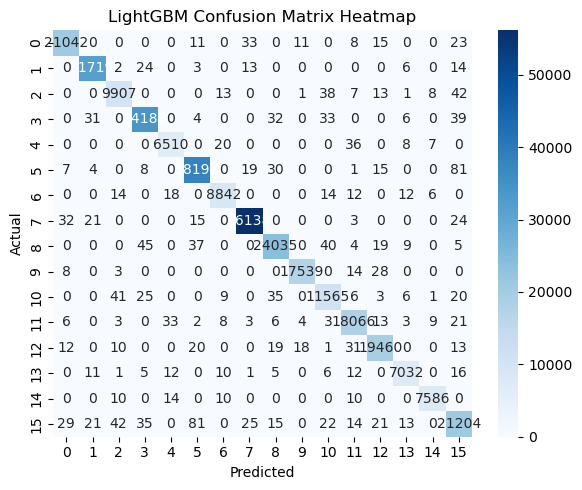

In [72]:
import time
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
#STRATIFIED SAMPLING (10,000 samples)
max_samples = 10_000
if len(X_train) > max_samples:
    X_train_sub, _, y_train_sub, _ = train_test_split(
        X_train,
        y_train,
        train_size=max_samples,
        stratify=y_train,
        random_state=42
    )
else:
    X_train_sub = X_train
    y_train_sub = y_train

print("Using training samples:", len(X_train_sub))
print("Class distribution:")
print(y_train_sub.value_counts(normalize=True))
# DEFINE LIGHTGBM + HYPERPARAMETER SEARCH SPACE
lgbm = lgb.LGBMClassifier(
    objective='multiclass',
    n_jobs=-1,
    random_state=42,
    verbose=-1
)
param_dist = {
    'n_estimators': [200, 300, 400],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'max_depth': [4, 6, 8, 10, -1],
    'num_leaves': [31, 63, 127, 255],
    'min_child_samples': [10, 20, 30, 50],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}
# RANDOMIZED SEARCH ON THE 10K SAMPLED DATA
random_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist,
    n_iter=10,               # number of hyperparameter combinations
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=2,
    random_state=42
)
print("Running RandomizedSearchCV...")

start_time = time.time()
random_search.fit(X_train_small, y_train_small)
end_time = time.time()

print("\nRandomized Search Completed!")
print(f"Total time: {end_time - start_time:.2f} seconds")
print("Best Parameters Found:", random_search.best_params_)
print("Best CV Accuracy:", random_search.best_score_)

# TRAIN FINAL MODEL ON FULL TRAINING SET

best_lgbm = random_search.best_estimator_

print("Training final model with best parameters...")
best_lgbm.fit(X_train, y_train)
print("Final model training complete!")
#EVALUATE ON TEST SET

predictions = best_lgbm.predict(X_test)
train_preds = best_lgbm.predict(X_train)

print("Classification Report:\n", classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", cm)

print("LightGBM Train Accuracy:", accuracy_score(y_train, train_preds))
print("LightGBM Test Accuracy:", accuracy_score(y_test, predictions))


#CONFUSION MATRIX HEATMAP

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("LightGBM Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


### EGBM (Explainable Gradient Boosting Machine)

#### Baseline Model

In [ ]:
import time
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from interpret.glassbox import ExplainableBoostingClassifier

# =========================
# Initialize EGBM
# =========================
ebgm = ExplainableBoostingClassifier(
    learning_rate=0.05,       # step size
    max_bins=255,              # number of bins for numeric features
    max_interaction_bins=32,   # number of bins for interactions
    interactions=5,            # number of pairwise interactions
    validation_size=0.1,       # fraction of training data for early stopping
    max_rounds=500,            # max boosting rounds
    random_state=42
)

# =========================
# Train the model
# =========================
start_time_train = time.time()
ebgm.fit(X_train, y_train)
end_time_train = time.time()
print("Training finished!")

# =========================
# Predictions
# =========================
start_time_predict = time.time()
predictions = ebgm.predict(X_test)
end_time_predict = time.time()

# =========================
# Evaluation metrics
# =========================
print("Classification Report:\n", classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", cm)

train_preds = ebgm.predict(X_train)
print("EGBM Train Accuracy:", accuracy_score(y_train, train_preds))
print("EGBM Test Accuracy:", accuracy_score(y_test, predictions))
print(f"EGBM training time: {end_time_train - start_time_train:.2f} seconds")
print(f"EGBM prediction time: {end_time_predict - start_time_predict:.2f} seconds")

# =========================
# Confusion Matrix Heatmap
# =========================
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("EGBM Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# =========================
# SHAP explanation (feature importance)
# =========================
explainer = shap.Explainer(ebgm.predict, X_test)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)


#### Hyperparameter Optimization

### Gradient Boosting Machine

#### Baseline Model

In [ ]:
import time
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize GBM
gbm = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=10,
    random_state=42,
    verbose=0
)

# Measure training time
start_time_train = time.time()
gbm.fit(X_train, y_train)
end_time_train = time.time()
print("Training finished!")

# Predictions and probabilities
start_time_predict = time.time()
predictions = gbm.predict(X_test)
probs = gbm.predict_proba(X_test)[:, 1]  # probability for positive class (class 1)
end_time_predict = time.time()

# Evaluation metrics
print("Classification Report:\n", classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", cm)

train_preds = gbm.predict(X_train)
print("GBM Train Accuracy:", accuracy_score(y_train, train_preds))
print("GBM Test Accuracy:", accuracy_score(y_test, predictions))
print(f"GBM training time: {end_time_train - start_time_train:.2f} seconds")
print(f"GBM prediction time: {end_time_predict - start_time_predict:.2f} seconds")

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("GBM Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


#### Hyperparameter Optimization

# Scratch

In [ ]:
# First, install RAPIDS (run this in a Colab cell)
!wget -qO- https://raw.githubusercontent.com/rapidsai/cuml/main/python/colab/rapids-colab.sh | bash
import sys
sys.path.append('/usr/local/lib/python3.8/site-packages')


In [ ]:
!nvidia-smi


In [ ]:
import itertools
import cudf
import numpy as np
from sklearn.metrics import accuracy_score  # or other preferred metric

# Example: split your training set further into train and validation sets
from sklearn.model_selection import train_test_split
X_train_cu, X_val_cu, y_train_cu, y_val_cu = train_test_split(
    X_train_cu, y_train_cu, test_size=0.2, random_state=42
)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'max_features': [0.5, 0.7, 1.0],
    'min_samples_split': [2, 5]
}

# Generate all parameter combinations
param_combinations = list(itertools.product(
    param_grid['n_estimators'],
    param_grid['max_depth'],
    param_grid['max_features'],
    param_grid['min_samples_split']
))

best_score = -np.inf
best_params = None

for n_estimators, max_depth, max_features, min_samples_split in param_combinations:
    print(f"Testing params: n_estimators={n_estimators}, max_depth={max_depth}, max_features={max_features}, min_samples_split={min_samples_split}")

    # Instantiate model with current params
    rf = cuRF(
        n_estimators=n_estimators,
        max_depth=max_depth,
        max_features=max_features,
        min_samples_split=min_samples_split,
        random_state=42
    )

    # Fit on training set (GPU)
    rf.fit(X_train_cu, y_train_cu)

    # Predict on validation set
    preds_cu = rf.predict(X_val_cu)
    preds = preds_cu.to_pandas().to_numpy()  # convert to CPU numpy

    y_val = y_val_cu.to_pandas().to_numpy()

    # Calculate accuracy or your preferred metric
    score = accuracy_score(y_val, preds)
    print(f"Validation Accuracy: {score:.4f}")

    if score > best_score:
        best_score = score
        best_params = {
            'n_estimators': n_estimators,
            'max_depth': max_depth,
            'max_features': max_features,
            'min_samples_split': min_samples_split
        }
        print("New best score found")

print(f"\nBest hyperparameters: {best_params}")
print(f"Best validation accuracy: {best_score:.4f}")

# After, train final model with best params on full training data
final_rf = cuRF(**best_params, random_state=42)
final_rf.fit(X_train_cu, y_train_cu)

# Use final_rf for test predictions, evaluation, etc.


In [ ]:
cluster_stats_unscaled = df_original.groupby('cluster').agg({
    'pH (ph units)': ['std'],
    'Ammonia (mg/l)': ['mean'],
    'Nitrate (mg/l)': ['mean'],
    'Dissolved Oxygen (mg/l)': ['mean'],
    'Biochemical Oxygen Demand (mg/l)': ['mean']
})

# Flatten the MultiIndex columns
cluster_stats_unscaled.columns = [
    'pH_std', 'Ammonia_mean', 'Nitrate_mean', 'DO_mean', 'BOD_mean'
]

# Lower BOD, NH3, NO3 preferred; higher DO preferred; lower pH variance preferred.
cluster_stats_unscaled['score'] = (
    -cluster_stats_unscaled['BOD_mean']   # negative for lower is better
    + cluster_stats_unscaled['DO_mean']   # positive for higher is better
    - cluster_stats_unscaled['Nitrate_mean']
    - cluster_stats_unscaled['Ammonia_mean']
    - cluster_stats_unscaled['pH_std']    # negative for more stable pH
)

cluster_means = cluster_stats_unscaled.sort_values('score', ascending=False)
labels = []
for i, row in cluster_means.iterrows():
    if i < 4:
        labels.append(f'A{i+1}')
    elif i < 8:
        labels.append(f'B{i-3}')
    elif i < 12:
        labels.append(f'C{i-7}')
    else:
        labels.append(f'D{i-11}')
cluster_means['label'] = labels

# Assuming your clusters are 0-15 and labels are in same order
cluster_label_map = dict(zip(cluster_means.index, cluster_means['label']))
df_original['class_label'] = df_original['cluster'].map(cluster_label_map)


df_original['class_label'].value_counts().sort_index()
